## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [30]:
import pandas as pd
import re
import glob
import copy
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [31]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
    files = glob.glob('data_raw{}*.xlsx'.format(os.sep))
    filenames = []
    for file in files:
        file = file.split(os.sep)
        filenames.append(file[-1])
    return filenames
    


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', 'Python-QUIZ Functions (18 min.)-grades.xlsx', 'Python-QUIZ Coercion (6 min.)-grades.xlsx', 'Python-QUIZ Strings (5 min.)-grades.xlsx', 'Python-QUIZ Lists (10 min.)-grades.xlsx', 'Python-QUIZ Iterations (6 min.)-grades.xlsx', 'Python-QUIZ Sets (7 min)-grades.xlsx', 'Python-QUIZ Exceptions (10 min.)-grades.xlsx', 'Python-QUIZ Dictionaries (10 min.)-grades.xlsx', 'Python-QUIZ Tuples (10 min.)-grades.xlsx', 'Python-QUIZ Conditionals (6 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [32]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
    for file in files:
        ans = bool(re.search(s,file))
        if ans == True:
            return file

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [33]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    
    filenames = Q2_function(files,s)
    if filenames:
        return pd.read_excel('data_raw/'+filenames,index_col=0)
    return None


# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
print(functions_df)

       State                  Started on                   Completed  \
0   Finished    February 5 2018  3:19 PM    February 5 2018  3:34 PM   
1   Finished    February 4 2018  4:01 PM    February 4 2018  4:19 PM   
12  Finished    February 6 2018  3:57 PM    February 6 2018  4:12 PM   
2   Finished   February 10 2018  4:05 PM   February 10 2018  4:23 PM   
3   Finished    February 4 2018  4:59 PM    February 4 2018  5:16 PM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:38 PM   
5   Finished   February 10 2018  9:49 PM  February 10 2018  10:07 PM   
6   Finished    February 5 2018  8:30 PM    February 5 2018  8:48 PM   
7   Finished   February 13 2018  4:17 AM   February 13 2018  4:35 AM   
8   Finished   February 12 2018  2:19 PM   February 12 2018  2:35 PM   
9   Finished  February 13 2018  10:45 AM  February 13 2018  11:03 AM   
10  Finished   February 11 2018  1:48 AM   February 11 2018  2:06 AM   
4   Finished    February 5 2018  5:20 PM    February 5 2018  5:3

### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [34]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    return (dataframe.columns.values,dataframe.loc[:, ['id','Time taken','Grade/45.00','Q. 1 /5.00','Q. 2 /10.00','Q. 3 /6.00',
                                                       'Q. 4 /6.00','Q. 5 /12.00','Q. 6 /6.00']],dataframe.head(10))


# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State' 'Started on' 'Completed' 'Time taken' 'Grade/45.00' 'Q. 1 /5.00'
 'Q. 2 /10.00' 'Q. 3 /6.00' 'Q. 4 /6.00' 'Q. 5 /12.00' 'Q. 6 /6.00' 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22           4     

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [35]:
#Defining an external function for converting time into total seconds
def time_conversion(time_df):
    time_seconds = 0
    minutes = re.search(r'(\d+)\smin',time_df['Timetaken'])
#     print("Minutes: ",minutes.group(1))
    if minutes:
        time_seconds += int(minutes.group(1))*60
    seconds = re.search(r'(\d+)\ssec',time_df['Timetaken'])
    if seconds:
        time_seconds += int(seconds.group(1))
    return time_seconds
    
def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    column_dtypes = [str(x) for x in df.dtypes]
    df = df.rename(columns = lambda x: re.sub(r'\s+', '', x))
    if df['Timetaken'].isnull().any():
        df['Timetaken'].fillna(0, inplace=True)
    df['time'] = df.apply(time_conversion, axis = 1)
    
    return column_dtypes, df.drop(labels='Timetaken', axis=1)
    


# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
['int64', 'object', 'int64', 'int64', 'int64', 'int64', 'object', 'object', 'object']

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22         4          4         6     0.00      8.00   
9    9           22         5          8         6     3.00         -   

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [36]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE
    columns_to_change = df.select_dtypes(include='object').columns.values
    df = df.copy()
    df.drop_duplicates(inplace=True)
    df.replace(to_replace = '-', value = np.nan, inplace = True)
    df.loc[:, columns_to_change] = df.loc[:, columns_to_change].apply(pd.to_numeric, errors = 'coerce')
    df.fillna(df.mean(), inplace=True)
    df_mean = pd.DataFrame.from_dict({'mean': df.mean()}, 'index')
    df_mean.loc['mean', 'id'] = df['id'].max() + 1
    df = df.append(df_mean, ignore_index = True, sort=False)
    df.loc[:, 'id'] = df.loc[:, 'id'].astype('int64')
    df.loc[:, 'time'] = df.loc[:, 'time'].astype('int64')
    return df
# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0    0    32.000000  5.000000   6.000000  6.000000       3.0      12.00   
1    1    31.000000  5.000000   8.000000  6.000000       2.0      12.00   
2   12    20.000000  3.000000   4.000000  3.000000       2.0      10.00   
3    2    30.000000  5.000000   6.000000  6.000000       3.0      10.00   
4    3    26.000000  5.000000   6.000000  6.000000       3.0       6.00   
5    4    25.000000  5.000000   6.000000  6.000000       6.0       2.00   
6    5    24.000000  5.000000   6.000000  6.000000       3.0       4.00   
7    6    23.000000  5.000000   6.000000  0.000000       0.0       6.00   
8    7    23.000000  4.000000   4.000000  6.000000       3.0       6.00   
9    8    22.000000  4.000000   4.000000  6.000000       0.0       8.00   
10   9    22.000000  5.000000   8.000000  6.000000       3.0       5.75   
11  10    21.000000  5.000000  10.000000  6.000000       2.0       5.75   
12  11    21.000000  4.00

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [37]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    df = Q3_function(Q1_function(), s = file)
    stats = df['Grade/21.00'].describe().round(decimals=2)
    return stats['mean'], stats['std'], stats['25%'], stats['50%'], stats['75%'], stats['max'], stats['min']

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

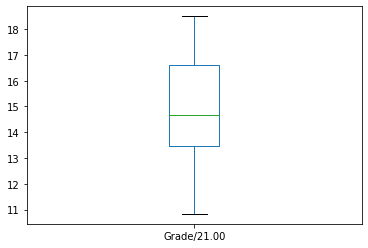

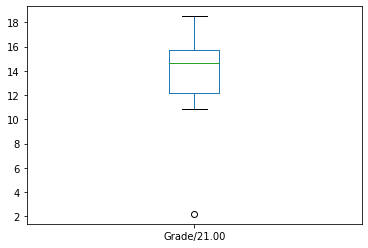

In [38]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    #Created a BoxPlot of the previous question in order to compare values
    result = list(Q7_function(file))
    df7 = pd.DataFrame(result, columns = ['Grade/21.00'])
    Q8_plot_1 = df7[['Grade/21.00']].plot.box(return_type='axes')
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [39]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    
    return Q3_function(Q1_function(), s = file).shape


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [40]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE
    df = df.replace(to_replace = '-', value = 0)
    df['Q.5/12.00'] = df['Q.5/12.00'].apply(pd.to_numeric).astype('int64')
    max_score = df['Q.5/12.00'].max()
    gb = df.groupby('Q.5/12.00').count()
    students_zero_marks = df[df['Q.5/12.00'] == 0]['id']
#     print(s)
    return students_zero_marks, gb['id'][max_score]


# Call the function and print the results
# print(Q5_df)
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : 9      9
10    10
13    13
17    17
18    18
Name: id, dtype: int64
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [41]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    df_tuples = Q3_function(filenames, s = "Tuples")
    df_taxonomy = Q3_function(filenames, s = "Taxonomy")
    
    _, df_tuples = Q5_function(df_tuples)
    _, df_taxonomy = Q5_function(df_taxonomy)
    
    df_merge = df_tuples.merge(df_taxonomy, on = 'id')
    df_merge['Total_score'] = df_merge['Grade/20.00'] + df_merge['Grade/21.00']
    max_scorer = df_merge.loc[df_merge['Total_score']==df_merge['Total_score'].max(), 'id'].values[0]
    return df_merge, max_scorer


# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)
# print(Q11_df)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [42]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
    
    return sorted(df.loc[df['time_x'] + df['time_y'] < 1200,'id'].values)


# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [43]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    
    df['bins'] = pd.cut(df['Grade/45.00'], bins = 5)
    q13_df = df[df['id'] != 19].groupby('bins')['id'].apply(list)
#     print(q13_df.values)
    count = []
    for i in q13_df.values:
        count.append(len(i))
    return pd.DataFrame({'bins':q13_df.index,'count': count})

# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

             bins  count
0  (12.981, 16.8]      4
1    (16.8, 20.6]      3
2    (20.6, 24.4]      7
3    (24.4, 28.2]      2
4    (28.2, 32.0]      3


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [44]:
import unittest
import warnings
class TestNotebook(unittest.TestCase):
    
    def test_Q01_function(self):
        ans = ['Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx',
               'Python-QUIZ Functions (18 min.)-grades.xlsx',
               'Python-QUIZ Coercion (6 min.)-grades.xlsx',
               'Python-QUIZ Strings (5 min.)-grades.xlsx',
               'Python-QUIZ Lists (10 min.)-grades.xlsx',
               'Python-QUIZ Iterations (6 min.)-grades.xlsx',
               'Python-QUIZ Sets (7 min)-grades.xlsx',
               'Python-QUIZ Exceptions (10 min.)-grades.xlsx',
               'Python-QUIZ Dictionaries (10 min.)-grades.xlsx',
               'Python-QUIZ Tuples (10 min.)-grades.xlsx',
               'Python-QUIZ Conditionals (6 min.)-grades.xlsx']
        result = Q1_function()
        self.assertEqual(ans, result)


    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])
        
    
    def test_Q03_function(self):
#         warnings.simplefilter(action = 'ignore',category = 'FutureWarning')
#         warnings.simplefilter(action = 'ignore',category = 'PendingDeprecationWarning')
        warnings.filterwarnings("ignore")
        result = Q3_function(Q1_function(), s = "Functions")
        ans_shape_expected = (24, 12)
        self.assertEqual(ans_shape_expected, result.shape)
        
        ans_names_expected = ['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00',
                          'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00',
                          'Q. 6 /6.00', 'id']
        self.assertEqual(ans_names_expected, list(result.columns.values))

        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))


    def test_Q05_function(self):
        result_dtypes, result = Q5_function(df_subset) 
        ans_dtypes_expected = ['int64', 'object', 'int64','int64', 'int64', 'int64','object', 'object', 'object']
        self.assertEqual(ans_dtypes_expected, result_dtypes)
        ans_shape_expected = (24, 9)
        self.assertEqual(ans_shape_expected, result.shape)
        ans_names_expected = ['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00','Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00', 'time']
        self.assertEqual(ans_names_expected, list(result.columns.values))


    def test_Q06_function(self):
        result = Q6_function(Q5_df)
        ans_dtypes_expected = ['int64', 'float64', 'float64','float64', 'float64', 'float64','float64', 'float64', 'int64']
        self.assertEqual(ans_dtypes_expected, list(result.dtypes.values))
        ans_shape_expected = (20, 9)
        self.assertEqual(ans_shape_expected, result.shape)
        ans_names_expected = ['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00','Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00', 'time']
        self.assertEqual(ans_names_expected, result.columns.values.tolist())
        
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)


    def test_Q08_function(self):
        pass
        
    
    def test_Q09_function(self):
        result = Q9_function(file='Strings')
        ans_shape_expected = (17, 7)
        self.assertEqual(ans_shape_expected, result)
        
        
    def test_Q10_function(self):
        result_zero,result_max = Q10_function(Q5_df)
        result = (len(result_zero),result_max)
        ans_counts_expected = (5, 2)
        self.assertEqual(ans_counts_expected, result)
        
        
    def test_Q11_function(self):
        result, result_id = Q11_function()
        ans_id_expected = 10
        self.assertEqual(ans_id_expected, result_id)
        ans_shape_expected = (14, 17)
        self.assertEqual(ans_shape_expected, result.shape)
        
        ans_names_expected = ['State_x', 'Startedon_x', 'Completed_x',
                         'Grade/20.00', 'Q.1/10.00', 'Q.2/10.00_x',
                         'id', 'time_x', 'State_y', 'Startedon_y',
                         'Completed_y', 'Grade/21.00', 'Q.1/5.00',
                         'Q.2/10.00_y', 'Q.3/6.00', 'time_y', 'Total_score']
        self.assertEqual(ans_names_expected, result.columns.values.tolist())

        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
    
    
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = temp['count'].tolist()
        
        for x in range(len(ans)):
            self.assertEqual(result[x], len(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q08_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.246s

OK
